In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf

In [2]:
from keras.datasets import mnist

(x1_train, y1_train) , (x1_test, y1_test) = mnist.load_data()

from keras.datasets import cifar10

(x2_train, y2_train) , (x2_test, y2_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
print("Shape of training data (mnist):")
print(x1_train.shape)
print(y1_train.shape)
print("Shape of test data (mnist):")
print(x1_test.shape)
print(y1_test.shape)

Shape of training data (mnist):
(60000, 28, 28)
(60000,)
Shape of test data (mnist):
(10000, 28, 28)
(10000,)


In [4]:
print("Shape of training data (cifar10):")
print(x2_train.shape)
print(y2_train.shape)
print("Shape of test data (cifar10):")
print(x2_test.shape)
print(y2_test.shape)

Shape of training data (cifar10):
(50000, 32, 32, 3)
(50000, 1)
Shape of test data (cifar10):
(10000, 32, 32, 3)
(10000, 1)


Number of Classes in CIFAR-10:  10


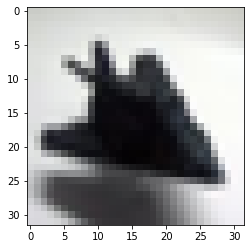

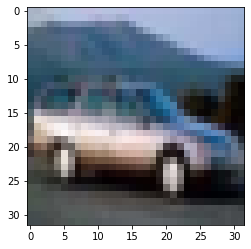

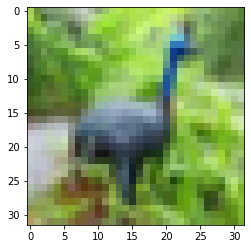

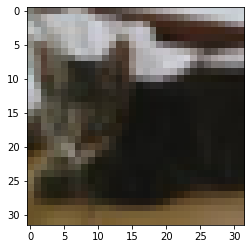

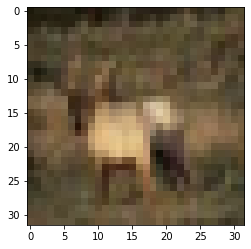

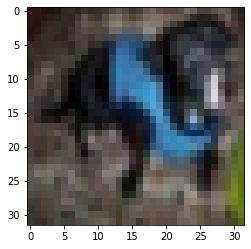

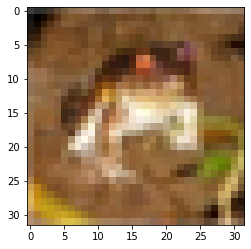

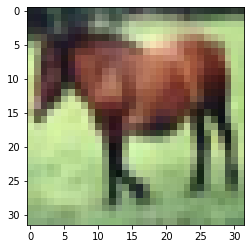

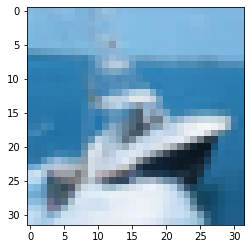

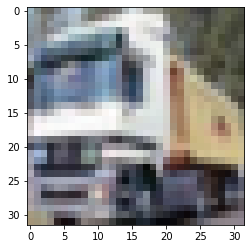

In [5]:
(val, id) = np.unique(y2_train, return_index=True)

print("Number of Classes in CIFAR-10: ",len(val))

for i in range(10):
  #plt.subplot(4, 4, i+1)
  plt.imshow(x2_train[id[i]])
  plt.show()

In [6]:
# Normalizing the Data:

x1_train = x1_train/255.0
x1_test = x1_test/255.0

x2_train = x2_train/255.0
x2_test = x2_test/255.0

In [7]:
# Data present per class:

classes_tr,freq_tr = np.unique(y2_train, return_counts=True)
freq_tr

array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000])

In [8]:
# Data present per class:

classes_tt,freq_tt = np.unique(y2_test, return_counts=True)
freq_tt

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])

### Every Class contains 5000 Instances in Training and 1000 Instances in Testing

> Q1. First CNN Model:

In [9]:
cifar10_model1 = tf.keras.models.Sequential()

cifar10_model1.add(tf.keras.Input(shape=[32,32,3]))
cifar10_model1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=5, activation="relu", padding="valid", name="ConvnLayer"))           # padding = "same"
cifar10_model1.add(tf.keras.layers.MaxPool2D(pool_size=2, name="PoolLayer"))                                                          # strides = 2
cifar10_model1.add(tf.keras.layers.Flatten())
cifar10_model1.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer"))                                          # kernel_regularizer=tf.keras.regularizers.l2()
cifar10_model1.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
#optzr = tf.keras.optimizers.Adam(learning_rate = 0.01)
cifar10_model1.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

cifar10_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvnLayer (Conv2D)         (None, 28, 28, 32)        2432      
                                                                 
 PoolLayer (MaxPooling2D)    (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 HiddenLayer (Dense)         (None, 100)               627300    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 630,742
Trainable params: 630,742
Non-trainable params: 0
_________________________________________________________________


In [10]:
cifar10_history_1 = cifar10_model1.fit(x2_train, y2_train, batch_size=35, epochs=40, validation_split=0.2)

Epoch 1/40
1143/1143 [==============================] - 17s 5ms/step - loss: 1.5112 - accuracy: 0.4568 - val_loss: 1.3379 - val_accuracy: 0.5257
Epoch 2/40
1143/1143 [==============================] - 5s 5ms/step - loss: 1.2250 - accuracy: 0.5680 - val_loss: 1.1940 - val_accuracy: 0.5832
Epoch 3/40
1143/1143 [==============================] - 4s 4ms/step - loss: 1.0790 - accuracy: 0.6188 - val_loss: 1.1092 - val_accuracy: 0.6174
Epoch 4/40
1143/1143 [==============================] - 4s 4ms/step - loss: 0.9645 - accuracy: 0.6636 - val_loss: 1.0821 - val_accuracy: 0.6293
Epoch 5/40
1143/1143 [==============================] - 5s 4ms/step - loss: 0.8662 - accuracy: 0.6987 - val_loss: 1.1636 - val_accuracy: 0.6086
Epoch 6/40
1143/1143 [==============================] - 5s 5ms/step - loss: 0.7884 - accuracy: 0.7239 - val_loss: 1.1187 - val_accuracy: 0.6316
Epoch 7/40
1143/1143 [==============================] - 4s 4ms/step - loss: 0.7172 - accuracy: 0.7504 - val_loss: 1.1280 - val_accuracy

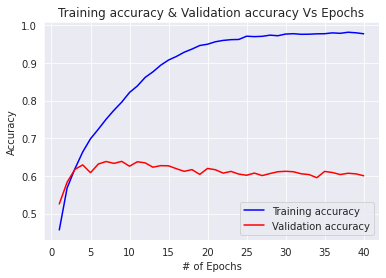

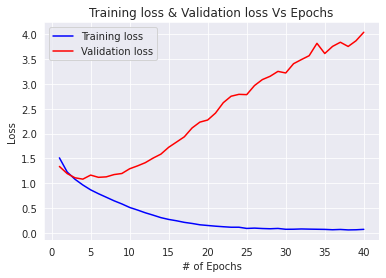

In [11]:
sb.set_style("darkgrid")

cifar10_acc_1 = cifar10_history_1.history['accuracy']
cifar10_val_acc_1 = cifar10_history_1.history['val_accuracy']
cifar10_loss_1 = cifar10_history_1.history['loss']
cifar10_val_loss_1 = cifar10_history_1.history['val_loss']

cifar10_epochs_1 = range(1, len(cifar10_acc_1) + 1)

#Train and validation accuracy

plt.plot(cifar10_epochs_1, cifar10_acc_1, 'b', label='Training accuracy')
plt.plot(cifar10_epochs_1, cifar10_val_acc_1, 'r', label='Validation accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy & Validation accuracy Vs Epochs')
plt.legend()

print("\n\n")

plt.figure()

#Train and validation loss

plt.plot(cifar10_epochs_1, cifar10_loss_1, 'b', label='Training loss')
plt.plot(cifar10_epochs_1, cifar10_val_loss_1, 'r', label='Validation loss')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.title('Training loss & Validation loss Vs Epochs')
plt.legend()

plt.show()

In [12]:
cifar10_model1.evaluate(x2_test,y2_test)

313/313 [==============================] - 1s 3ms/step - loss: 4.1651 - accuracy: 0.5994


[4.1650800704956055, 0.599399983882904]

In [13]:
mnist_model1 = tf.keras.models.Sequential()

mnist_model1.add(tf.keras.Input(shape=[28,28,1]))
mnist_model1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=5, activation="relu", padding="valid", name="ConvnLayer"))           # padding="same"
mnist_model1.add(tf.keras.layers.MaxPool2D(pool_size=2, name="PoolLayer"))                                                          # strides = 2
mnist_model1.add(tf.keras.layers.Flatten())
mnist_model1.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer"))                                          # kernel_regularizer=tf.keras.regularizers.l2()
mnist_model1.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
#optzr = tf.keras.optimizers.Adam(learning_rate = 0.01)
mnist_model1.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

mnist_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvnLayer (Conv2D)         (None, 24, 24, 32)        832       
                                                                 
 PoolLayer (MaxPooling2D)    (None, 12, 12, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 HiddenLayer (Dense)         (None, 100)               460900    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
_________________________________________________________________


In [14]:
mnist_history_1 = mnist_model1.fit(x1_train,y1_train,batch_size=32,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1474 - accuracy: 0.9566 - val_loss: 0.0617 - val_accuracy: 0.9826
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0504 - accuracy: 0.9847 - val_loss: 0.0453 - val_accuracy: 0.9857
Epoch 3/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0343 - accuracy: 0.9893 - val_loss: 0.0535 - val_accuracy: 0.9837
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0464 - val_accuracy: 0.9863
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0500 - val_accuracy: 0.9861
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.0426 - val_accuracy: 0.9882
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.0518 - val_accuracy:

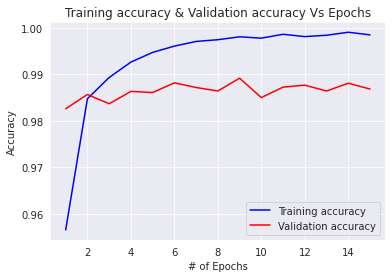

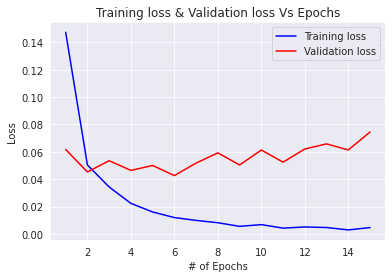

In [15]:
sb.set_style("darkgrid")

mnist_acc_1 = mnist_history_1.history['accuracy']
mnist_val_acc_1 = mnist_history_1.history['val_accuracy']
mnist_loss_1 = mnist_history_1.history['loss']
mnist_val_loss_1 = mnist_history_1.history['val_loss']

mnist_epochs_1 = range(1, len(mnist_acc_1) + 1)

#Train and validation accuracy

plt.plot(mnist_epochs_1, mnist_acc_1, 'b', label='Training accuracy')
plt.plot(mnist_epochs_1, mnist_val_acc_1, 'r', label='Validation accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy & Validation accuracy Vs Epochs')
plt.legend()

print("\n\n")

plt.figure()

#Train and validation loss

plt.plot(mnist_epochs_1, mnist_loss_1, 'b', label='Training loss')
plt.plot(mnist_epochs_1, mnist_val_loss_1, 'r', label='Validation loss')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.title('Training loss & Validation loss Vs Epochs')
plt.legend()

plt.show()

In [16]:
mnist_model1.evaluate(x1_test,y1_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0613 - accuracy: 0.9880


[0.06126634031534195, 0.9879999756813049]

> Q2. Second CNN Model:

In [17]:
cifar10_model2 = tf.keras.models.Sequential()

cifar10_model2.add(tf.keras.Input(shape=[32,32,3]))
cifar10_model2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation="relu", padding="valid", name="ConvnLayer1"))           # padding="same"
cifar10_model2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation="relu", padding="valid", name="ConvnLayer2"))           # padding="same"
cifar10_model2.add(tf.keras.layers.MaxPool2D(pool_size=2, name="PoolLayer"))                                                           # strides = 2
cifar10_model2.add(tf.keras.layers.Flatten())
cifar10_model2.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer"))                                          # kernel_regularizer=tf.keras.regularizers.l2()
cifar10_model2.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
#optzr = tf.keras.optimizers.Adam(learning_rate = 0.01)
cifar10_model2.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

cifar10_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvnLayer1 (Conv2D)        (None, 30, 30, 32)        896       
                                                                 
 ConvnLayer2 (Conv2D)        (None, 28, 28, 32)        9248      
                                                                 
 PoolLayer (MaxPooling2D)    (None, 14, 14, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 HiddenLayer (Dense)         (None, 100)               627300    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 638,454
Trainable params: 638,454
Non-tr

In [18]:
cifar10_history_2 = cifar10_model2.fit(x2_train, y2_train, batch_size=35, epochs=40, validation_split=0.2)

Epoch 1/40
1143/1143 [==============================] - 6s 5ms/step - loss: 1.4170 - accuracy: 0.4917 - val_loss: 1.2298 - val_accuracy: 0.5673
Epoch 2/40
1143/1143 [==============================] - 5s 4ms/step - loss: 1.0417 - accuracy: 0.6336 - val_loss: 1.0665 - val_accuracy: 0.6209
Epoch 3/40
1143/1143 [==============================] - 8s 7ms/step - loss: 0.8886 - accuracy: 0.6913 - val_loss: 0.9704 - val_accuracy: 0.6651
Epoch 4/40
1143/1143 [==============================] - 9s 8ms/step - loss: 0.7631 - accuracy: 0.7338 - val_loss: 1.0097 - val_accuracy: 0.6632
Epoch 5/40
1143/1143 [==============================] - 6s 5ms/step - loss: 0.6505 - accuracy: 0.7761 - val_loss: 0.9766 - val_accuracy: 0.6758
Epoch 6/40
1143/1143 [==============================] - 5s 4ms/step - loss: 0.5431 - accuracy: 0.8117 - val_loss: 1.0471 - val_accuracy: 0.6706
Epoch 7/40
1143/1143 [==============================] - 6s 5ms/step - loss: 0.4401 - accuracy: 0.8483 - val_loss: 1.1328 - val_accuracy:

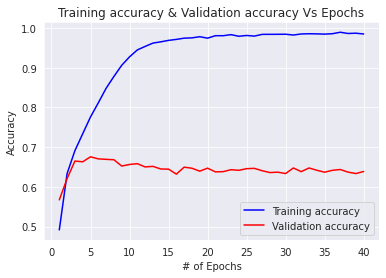

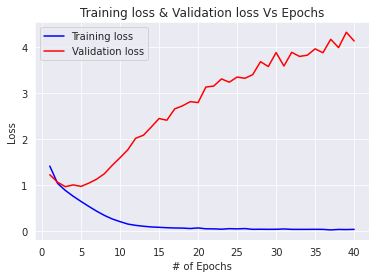

In [19]:
sb.set_style("darkgrid")

cifar10_acc_2 = cifar10_history_2.history['accuracy']
cifar10_val_acc_2 = cifar10_history_2.history['val_accuracy']
cifar10_loss_2 = cifar10_history_2.history['loss']
cifar10_val_loss_2 = cifar10_history_2.history['val_loss']

cifar10_epochs_2 = range(1, len(cifar10_acc_2) + 1)

#Train and validation accuracy

plt.plot(cifar10_epochs_2, cifar10_acc_2, 'b', label='Training accuracy')
plt.plot(cifar10_epochs_2, cifar10_val_acc_2, 'r', label='Validation accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy & Validation accuracy Vs Epochs')
plt.legend()

print("\n\n")

plt.figure()

#Train and validation loss

plt.plot(cifar10_epochs_2, cifar10_loss_2, 'b', label='Training loss')
plt.plot(cifar10_epochs_2, cifar10_val_loss_2, 'r', label='Validation loss')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.title('Training loss & Validation loss Vs Epochs')
plt.legend()

plt.show()

In [20]:
cifar10_model2.evaluate(x2_test,y2_test)

313/313 [==============================] - 1s 3ms/step - loss: 4.1990 - accuracy: 0.6285


[4.19900369644165, 0.6284999847412109]

In [21]:
mnist_model2 = tf.keras.models.Sequential()

mnist_model2.add(tf.keras.Input(shape=[28,28,1]))
mnist_model2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation="relu", padding="valid", name="ConvnLayer1"))           # padding="same"
mnist_model2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation="relu", padding="valid", name="ConvnLayer2"))           # padding="same"
mnist_model2.add(tf.keras.layers.MaxPool2D(pool_size=2, name="PoolLayer"))                                                           # strides = 2
mnist_model2.add(tf.keras.layers.Flatten())
mnist_model2.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer"))                                          # kernel_regularizer=tf.keras.regularizers.l2()
mnist_model2.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
#optzr = tf.keras.optimizers.Adam(learning_rate = 0.01)
mnist_model2.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

mnist_model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvnLayer1 (Conv2D)        (None, 26, 26, 32)        320       
                                                                 
 ConvnLayer2 (Conv2D)        (None, 24, 24, 32)        9248      
                                                                 
 PoolLayer (MaxPooling2D)    (None, 12, 12, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 HiddenLayer (Dense)         (None, 100)               460900    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 471,478
Trainable params: 471,478
Non-tr

In [22]:
mnist_history_2 = mnist_model2.fit(x1_train,y1_train,batch_size=32,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1336 - accuracy: 0.9594 - val_loss: 0.0685 - val_accuracy: 0.9794
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0425 - accuracy: 0.9867 - val_loss: 0.0507 - val_accuracy: 0.9837
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0257 - accuracy: 0.9916 - val_loss: 0.0471 - val_accuracy: 0.9872
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0169 - accuracy: 0.9945 - val_loss: 0.0443 - val_accuracy: 0.9884
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0135 - accuracy: 0.9954 - val_loss: 0.0472 - val_accuracy: 0.9893
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0680 - val_accuracy: 0.9860
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.0580 - val_accuracy:

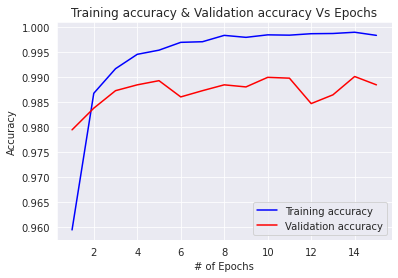

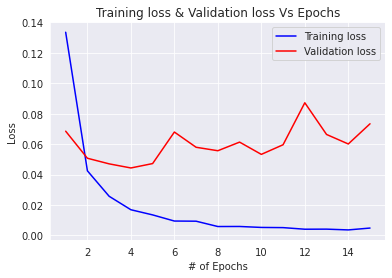

In [23]:
sb.set_style("darkgrid")

mnist_acc_2 = mnist_history_2.history['accuracy']
mnist_val_acc_2 = mnist_history_2.history['val_accuracy']
mnist_loss_2 = mnist_history_2.history['loss']
mnist_val_loss_2 = mnist_history_2.history['val_loss']

mnist_epochs_2 = range(1, len(mnist_acc_2) + 1)

#Train and validation accuracy

plt.plot(mnist_epochs_2, mnist_acc_2, 'b', label='Training accuracy')
plt.plot(mnist_epochs_2, mnist_val_acc_2, 'r', label='Validation accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy & Validation accuracy Vs Epochs')
plt.legend()

print("\n\n")

plt.figure()

#Train and validation loss

plt.plot(mnist_epochs_2, mnist_loss_2, 'b', label='Training loss')
plt.plot(mnist_epochs_2, mnist_val_loss_2, 'r', label='Validation loss')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.title('Training loss & Validation loss Vs Epochs')
plt.legend()

plt.show()

In [24]:
mnist_model2.evaluate(x1_test,y1_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0627 - accuracy: 0.9873


[0.06266254186630249, 0.9872999787330627]

> Q3. Design the LeNet-5 architecture:

In [25]:
cifar10_model3 = tf.keras.models.Sequential()

cifar10_model3.add(tf.keras.Input(shape=[32,32,3]))
cifar10_model3.add(tf.keras.layers.Conv2D(filters=6,kernel_size=5, activation="tanh", padding="same", name="ConvnLayer1"))         # strides = 1          # padding = 2
cifar10_model3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid", name="PoolLayer1"))
cifar10_model3.add(tf.keras.layers.Conv2D(filters=16,kernel_size=5, activation="tanh", padding="valid", name="ConvnLayer2"))                  # strides = 1
cifar10_model3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid", name="PoolLayer2"))
cifar10_model3.add(tf.keras.layers.Flatten())
cifar10_model3.add(tf.keras.layers.Dense(120, activation="sigmoid", name="HiddenLayer1"))                                    # kernel_regularizer=tf.keras.regularizers.l2()
cifar10_model3.add(tf.keras.layers.Dense(84, activation="sigmoid", name="HiddenLayer2"))                                     # kernel_regularizer=tf.keras.regularizers.l2()
cifar10_model3.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
#optzr = tf.keras.optimizers.Adam(learning_rate = 0.01)
cifar10_model3.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

cifar10_model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvnLayer1 (Conv2D)        (None, 32, 32, 6)         456       
                                                                 
 PoolLayer1 (MaxPooling2D)   (None, 16, 16, 6)         0         
                                                                 
 ConvnLayer2 (Conv2D)        (None, 12, 12, 16)        2416      
                                                                 
 PoolLayer2 (MaxPooling2D)   (None, 6, 6, 16)          0         
                                                                 
 flatten_4 (Flatten)         (None, 576)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 120)               69240     
                                                                 
 HiddenLayer2 (Dense)        (None, 84)               

In [26]:
cifar10_history_3 = cifar10_model3.fit(x2_train, y2_train, batch_size=35, epochs=40, validation_split=0.2)

Epoch 1/40
1143/1143 [==============================] - 6s 5ms/step - loss: 1.7235 - accuracy: 0.3719 - val_loss: 1.4695 - val_accuracy: 0.4677
Epoch 2/40
1143/1143 [==============================] - 5s 4ms/step - loss: 1.3993 - accuracy: 0.4908 - val_loss: 1.3157 - val_accuracy: 0.5261
Epoch 3/40
1143/1143 [==============================] - 6s 5ms/step - loss: 1.2688 - accuracy: 0.5418 - val_loss: 1.2337 - val_accuracy: 0.5571
Epoch 4/40
1143/1143 [==============================] - 5s 4ms/step - loss: 1.1689 - accuracy: 0.5809 - val_loss: 1.1789 - val_accuracy: 0.5783
Epoch 5/40
1143/1143 [==============================] - 5s 4ms/step - loss: 1.0983 - accuracy: 0.6080 - val_loss: 1.1498 - val_accuracy: 0.5925
Epoch 6/40
1143/1143 [==============================] - 5s 5ms/step - loss: 1.0365 - accuracy: 0.6325 - val_loss: 1.1234 - val_accuracy: 0.6019
Epoch 7/40
1143/1143 [==============================] - 5s 4ms/step - loss: 0.9825 - accuracy: 0.6533 - val_loss: 1.1043 - val_accuracy:

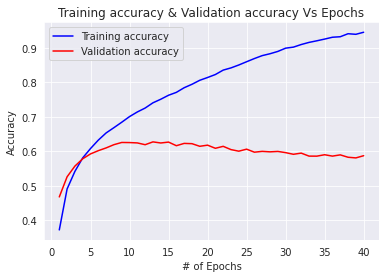

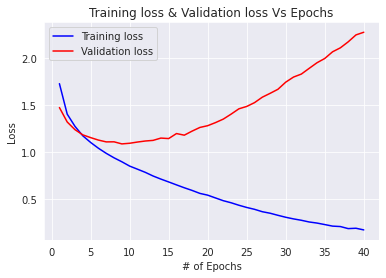

In [27]:
sb.set_style("darkgrid")

cifar10_acc_3 = cifar10_history_3.history['accuracy']
cifar10_val_acc_3 = cifar10_history_3.history['val_accuracy']
cifar10_loss_3 = cifar10_history_3.history['loss']
cifar10_val_loss_3 = cifar10_history_3.history['val_loss']

cifar10_epochs_3 = range(1, len(cifar10_acc_3) + 1)

#Train and validation accuracy

plt.plot(cifar10_epochs_3, cifar10_acc_3, 'b', label='Training accuracy')
plt.plot(cifar10_epochs_3, cifar10_val_acc_3, 'r', label='Validation accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy & Validation accuracy Vs Epochs')
plt.legend()

print("\n\n")

plt.figure()

#Train and validation loss

plt.plot(cifar10_epochs_3, cifar10_loss_3, 'b', label='Training loss')
plt.plot(cifar10_epochs_3, cifar10_val_loss_3, 'r', label='Validation loss')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.title('Training loss & Validation loss Vs Epochs')
plt.legend()

plt.show()

In [29]:
cifar10_model3.evaluate(x2_test,y2_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.3394 - accuracy: 0.5758


[2.3393876552581787, 0.5758000016212463]

In [30]:
mnist_model3 = tf.keras.models.Sequential()

mnist_model3.add(tf.keras.Input(shape=[28,28,1]))
mnist_model3.add(tf.keras.layers.Conv2D(filters=6,kernel_size=5, activation="tanh", padding="same", name="ConvnLayer1"))         # strides = 1          # padding = 2
mnist_model3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid", name="PoolLayer1"))
mnist_model3.add(tf.keras.layers.Conv2D(filters=16,kernel_size=5, activation="tanh", padding="valid", name="ConvnLayer2"))                  # strides = 1
mnist_model3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding="valid", name="PoolLayer2"))
mnist_model3.add(tf.keras.layers.Flatten())
mnist_model3.add(tf.keras.layers.Dense(120, activation="sigmoid", name="HiddenLayer1"))                                    # kernel_regularizer=tf.keras.regularizers.l2()
mnist_model3.add(tf.keras.layers.Dense(84, activation="sigmoid", name="HiddenLayer2"))                                     # kernel_regularizer=tf.keras.regularizers.l2()
mnist_model3.add(tf.keras.layers.Dense(10, activation="softmax", name="OutputLayer"))
#optzr = tf.keras.optimizers.Adam(learning_rate = 0.01)
mnist_model3.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

mnist_model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvnLayer1 (Conv2D)        (None, 28, 28, 6)         156       
                                                                 
 PoolLayer1 (MaxPooling2D)   (None, 14, 14, 6)         0         
                                                                 
 ConvnLayer2 (Conv2D)        (None, 10, 10, 16)        2416      
                                                                 
 PoolLayer2 (MaxPooling2D)   (None, 5, 5, 16)          0         
                                                                 
 flatten_5 (Flatten)         (None, 400)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 120)               48120     
                                                                 
 HiddenLayer2 (Dense)        (None, 84)               

In [31]:
mnist_history_3 = mnist_model3.fit(x1_train,y1_train,batch_size=32,epochs=15,validation_split=0.2)

Epoch 1/15
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3486 - accuracy: 0.9099 - val_loss: 0.0939 - val_accuracy: 0.9722
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0736 - accuracy: 0.9788 - val_loss: 0.0587 - val_accuracy: 0.9830
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0519 - accuracy: 0.9845 - val_loss: 0.0528 - val_accuracy: 0.9846
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0395 - accuracy: 0.9880 - val_loss: 0.0489 - val_accuracy: 0.9852
Epoch 5/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0310 - accuracy: 0.9904 - val_loss: 0.0455 - val_accuracy: 0.9873
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0243 - accuracy: 0.9927 - val_loss: 0.0487 - val_accuracy: 0.9863
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0445 - val_accuracy:

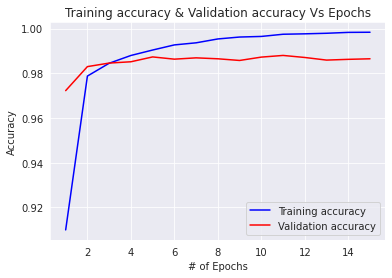

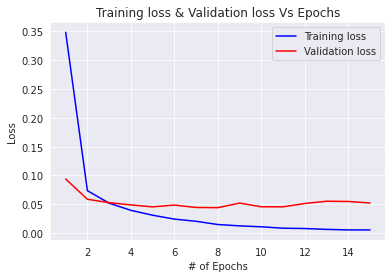

In [32]:
sb.set_style("darkgrid")

mnist_acc_3 = mnist_history_3.history['accuracy']
mnist_val_acc_3 = mnist_history_3.history['val_accuracy']
mnist_loss_3 = mnist_history_3.history['loss']
mnist_val_loss_3 = mnist_history_3.history['val_loss']

mnist_epochs_3 = range(1, len(mnist_acc_3) + 1)

#Train and validation accuracy

plt.plot(mnist_epochs_3, mnist_acc_3, 'b', label='Training accuracy')
plt.plot(mnist_epochs_3, mnist_val_acc_3, 'r', label='Validation accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.title('Training accuracy & Validation accuracy Vs Epochs')
plt.legend()

print("\n\n")

plt.figure()

#Train and validation loss

plt.plot(mnist_epochs_3, mnist_loss_3, 'b', label='Training loss')
plt.plot(mnist_epochs_3, mnist_val_loss_3, 'r', label='Validation loss')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.title('Training loss & Validation loss Vs Epochs')
plt.legend()

plt.show()

In [33]:
mnist_model3.evaluate(x1_test,y1_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0445 - accuracy: 0.9881


[0.0445416197180748, 0.988099992275238]

> **CONCLUSION:**

Best Model for cifar10 dataset:

Model - 2 i.e., The model with two consecutive Convolutions, because all three models overfitts in this data set with almost nature of being the same hence choosing the model the best accuracy 

Best Model for mnist dataset: 

Model - 3 i.e., LeNet-5 architecture because it has the least Validation loss and best loss curve compared to others and the accuracy of all models of this dataset is nearly the same